In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
numeric_df = df.select_dtypes(include=numerics)
numeric_df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [12]:
corr_df = numeric_df.corr()
corr_df.head()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

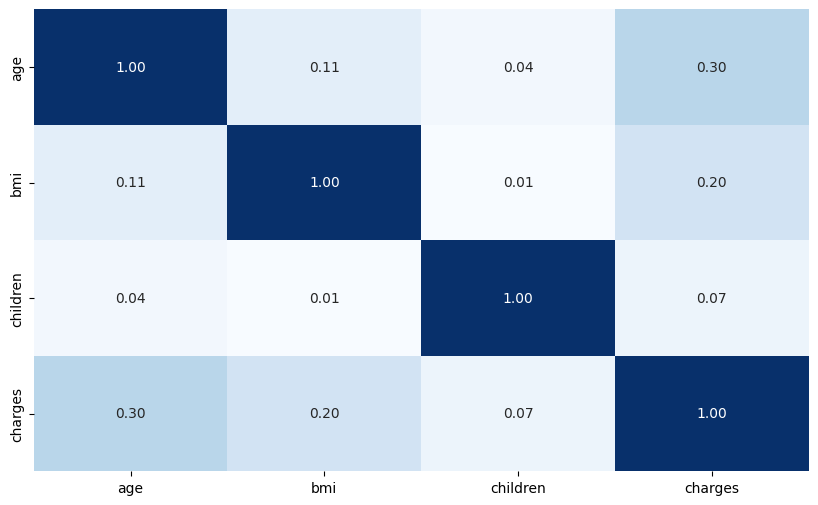

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="Blues", cbar=None)

<Axes: >

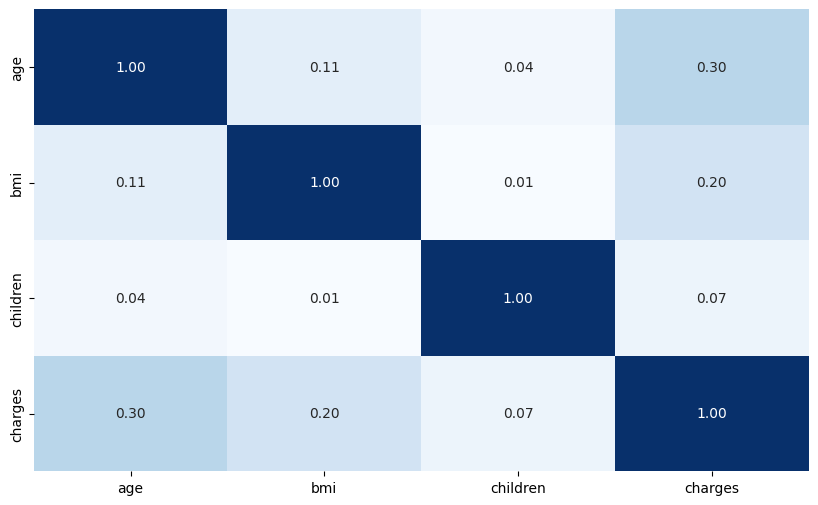

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
numeric_df = df.select_dtypes(include=numerics)
corr_df = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="Blues", cbar=None)

<Axes: >

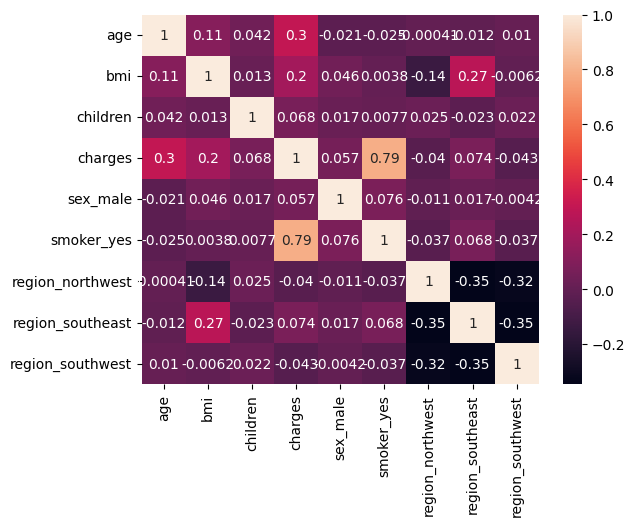

In [15]:
df_new = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)
df_new
sns.heatmap(df_new.corr(), annot=True)

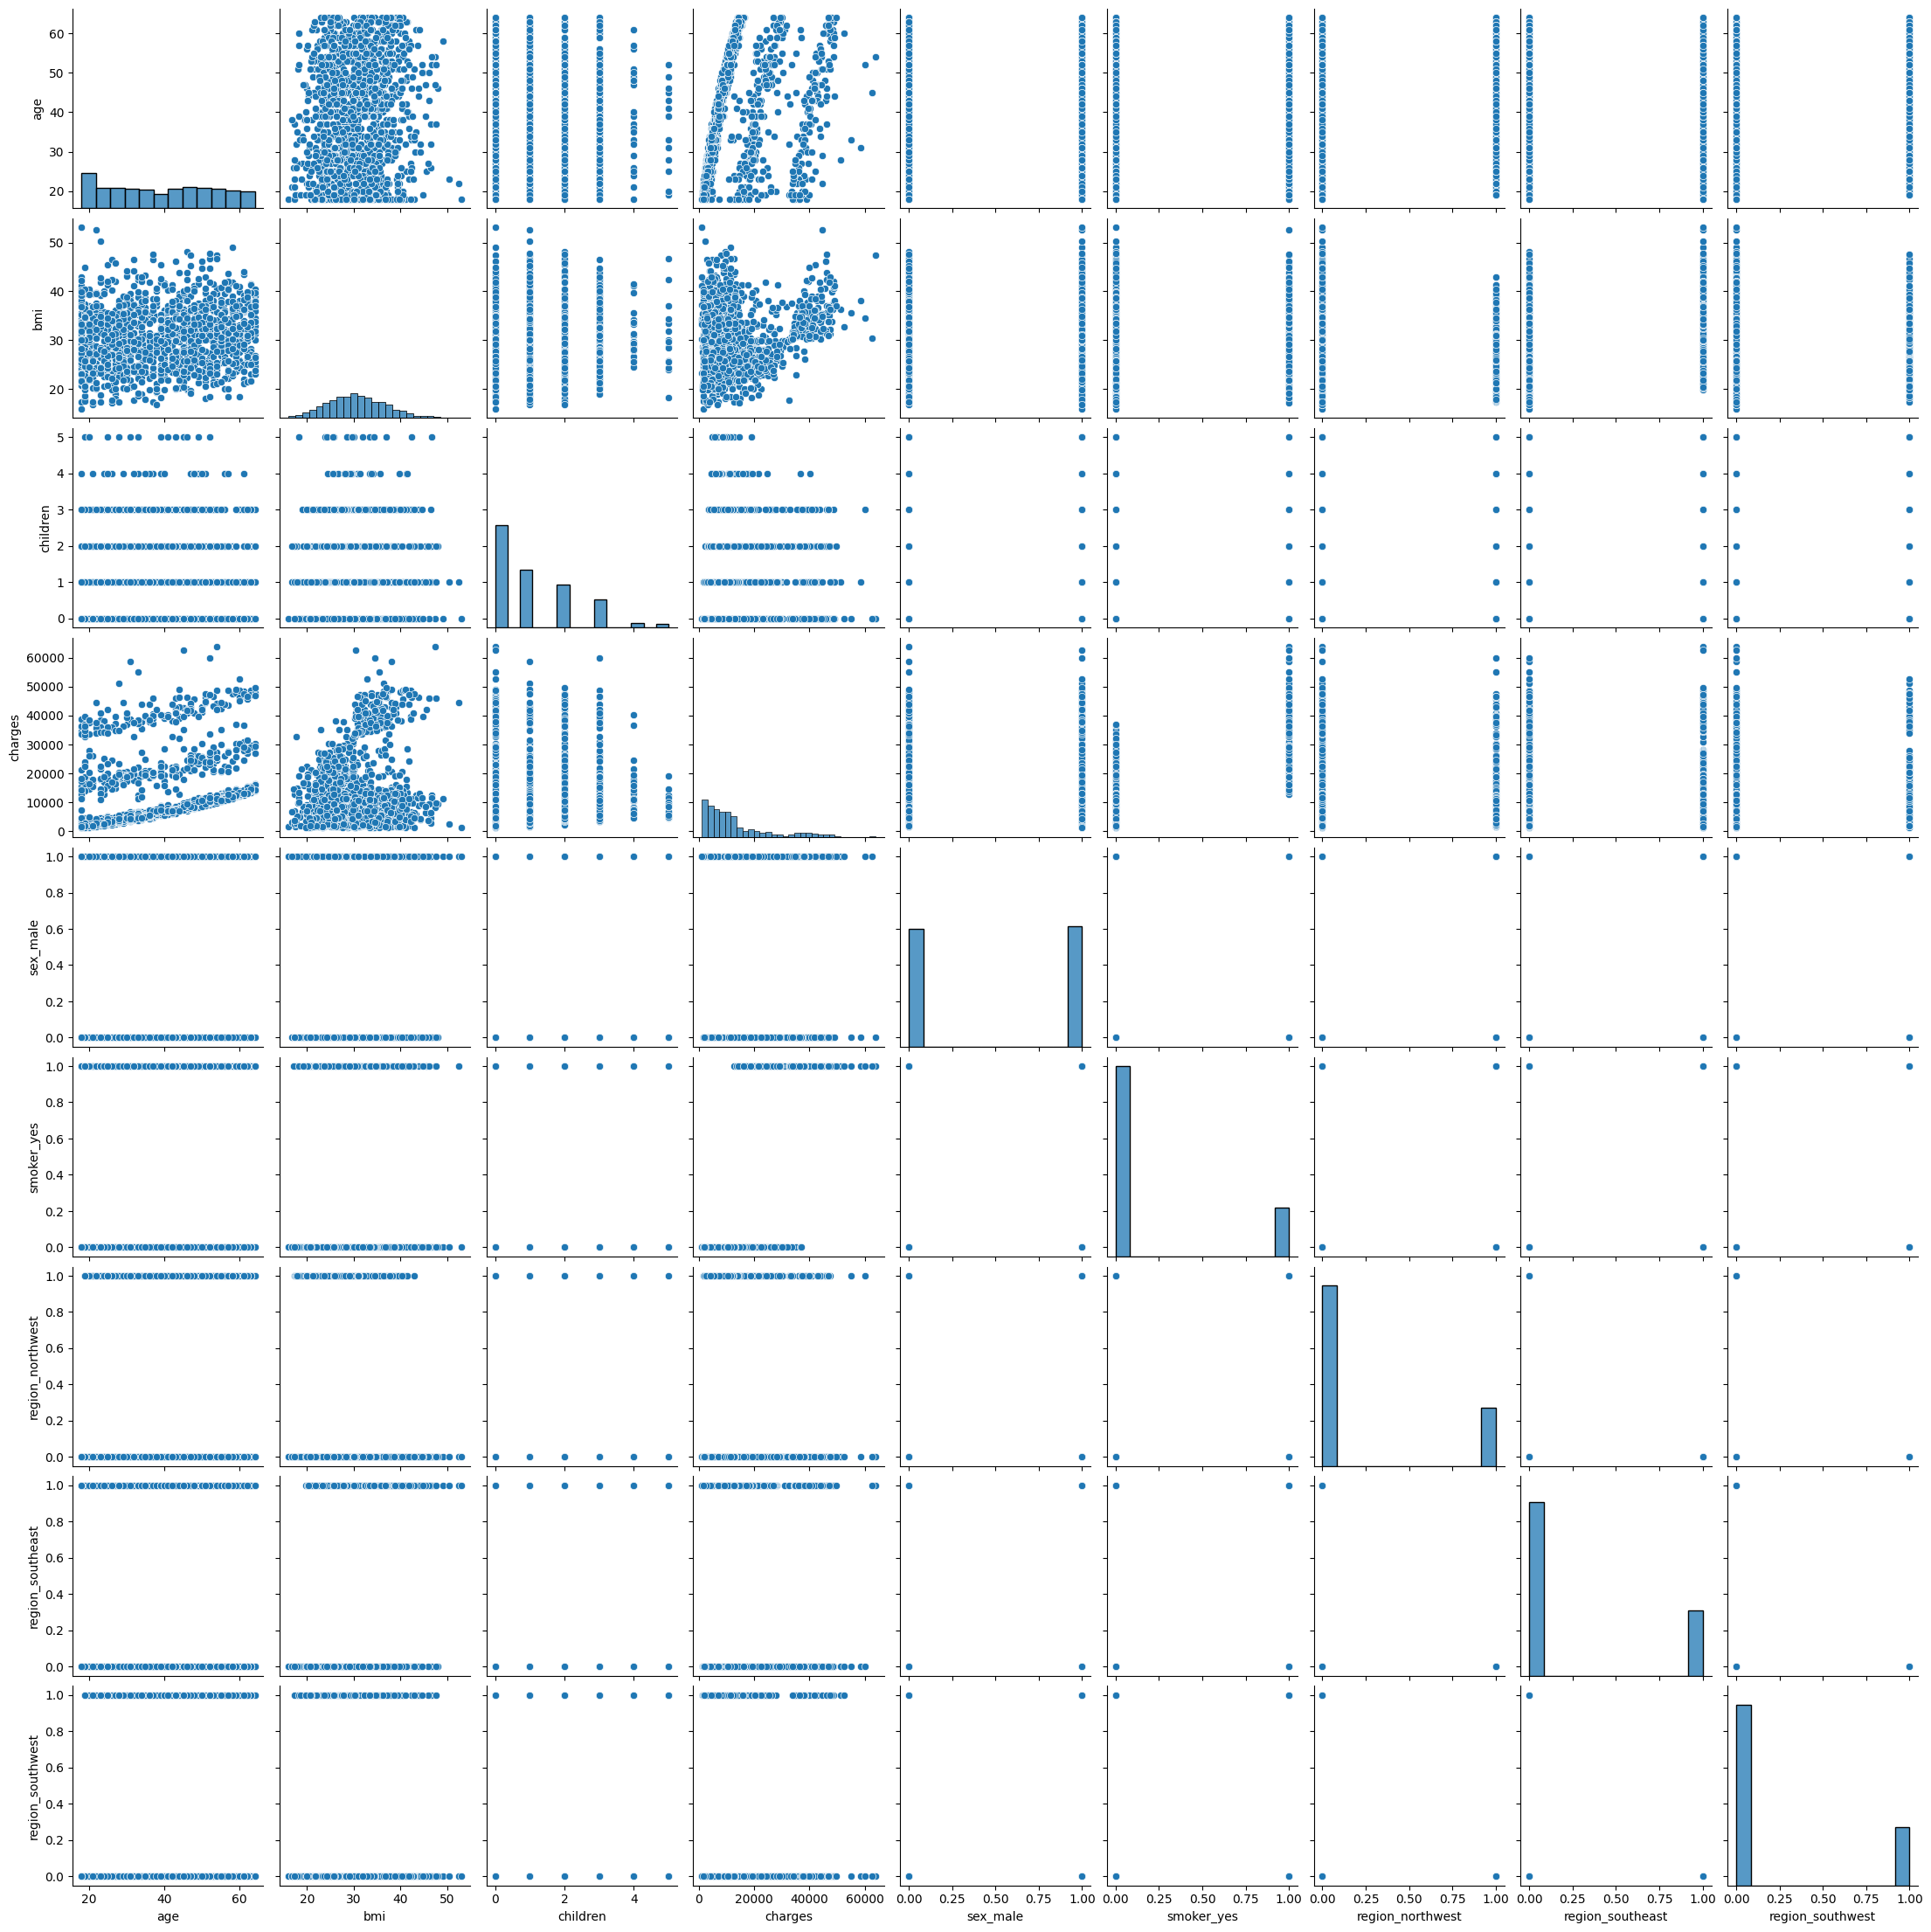

In [16]:
sns.pairplot(df_new)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

y = df_new["charges"]
X = df_new.drop(["charges"], axis=1)

models = {
    "lr": LinearRegression,
    "rf": RandomForestRegressor,
    "gb": GradientBoostingRegressor,
}
scores = []
niter = 100
for name, model in models.items():
    regr = model()
    for i in range(niter):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
        regr.fit(X_train, y_train)
        predict_test = regr.predict(X_test)
        score = r2_score(y_test, predict_test)
        scores.append([name, score])

scores_df = pd.DataFrame(scores).rename(columns={0: "Model", 1: "R2Score"})

scores_df.groupby("Model")["R2Score"].mean()

Model
gb    0.855305
lr    0.745784
rf    0.833223
Name: R2Score, dtype: float64

In [22]:
y = df_new["charges"]
X = df_new[["age", "bmi", "smoker_yes"]]

models = {
    "lr": LinearRegression,
    "rf": RandomForestRegressor,
    "gb": GradientBoostingRegressor,
}
scores = []
niter = 100
for name, model in models.items():
    regr = model()
    for i in range(niter):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
        regr.fit(X_train, y_train)
        predict_test = regr.predict(X_test)
        score = r2_score(y_test, predict_test)
        scores.append([name, score])

scores_df = pd.DataFrame(scores).rename(columns={0: "Model", 1: "R2Score"})

scores_df.groupby("Model")["R2Score"].mean()

Model
gb    0.853210
lr    0.742450
rf    0.814604
Name: R2Score, dtype: float64